In [1]:
# 📊 Day 10: Distributions and Outliers
# Author: David Caleb Chaparro Orozco
# Topic: Exploring Data Distributions and Detecting Outliers

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import bernoulli, binom, norm, uniform, zscore, probplot

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Create outputs directory if it doesn't exist
os.makedirs("outputs", exist_ok=True)

In [2]:
# Generate and save dataset
def generate_datasets():
    # Heights dataset (normal distribution)
    np.random.seed(42)
    heights = np.random.normal(loc=170, scale=10, size=1000)
    heights_data = pd.DataFrame({"heights": heights})
    heights_data.to_csv("data/heights_dataset.csv")

    # Sales dataset with outliers
    np.random.seed(42)
    sales = np.random.gamma(shape=2, scale=1000, size=200)
    # Add some outliers
    sales = np.append(sales, [8000, 9500, 7000, 12000])
    sales_data = pd.DataFrame({'sales_amount': sales})
    sales_data.to_csv('data/sales_dataset.csv', index=False)

    # Coin tosses dataset (Bernoulli/binomial)
    np.random.seed(42)
    coin_tosses = bernoulli.rvs(p=0.5, size=1000)
    coin_data = pd.DataFrame({'outcome': coin_tosses})
    coin_data.to_csv('data/coin_tosses.csv', index=False)
    
    # Dice rolls dataset (uniform discrete)
    np.random.seed(42)
    dice_rolls = np.random.randint(1, 7, size=1000)
    dice_data = pd.DataFrame({'roll': dice_rolls})
    dice_data.to_csv('data/dice_rolls.csv', index=False)

generate_datasets()

In [3]:
# Load datasets
heights_df = pd.read_csv("data/heights_dataset.csv")
sales_df = pd.read_csv("data/sales_dataset.csv")
coin_df = pd.read_csv("data/coin_tosses.csv")
dice_df = pd.read_csv("data/dice_rolls.csv")

## 1. Exploring Normal Distribution with Heights Data

In [4]:
print("Heights Dataset (Normal Distribution)")
print(heights_df.describe())

Heights Dataset (Normal Distribution)
        Unnamed: 0      heights
count  1000.000000  1000.000000
mean    499.500000   170.193321
std     288.819436     9.792159
min       0.000000   137.587327
25%     249.750000   163.524097
50%     499.500000   170.253006
75%     749.250000   176.479439
max     999.000000   208.527315


In [5]:
heights_df.head()

,Unnamed: 0,heights
0,0,174.967142
1,1,168.617357
2,2,176.476885
3,3,185.230299
4,4,167.658466


**Like measuring students in a classroom**  
The heights dataset follows a bell curve pattern where:
- Most people cluster around the average height (170cm)
- Fewer people are extremely tall or short
- The distribution is symmetric about the mean

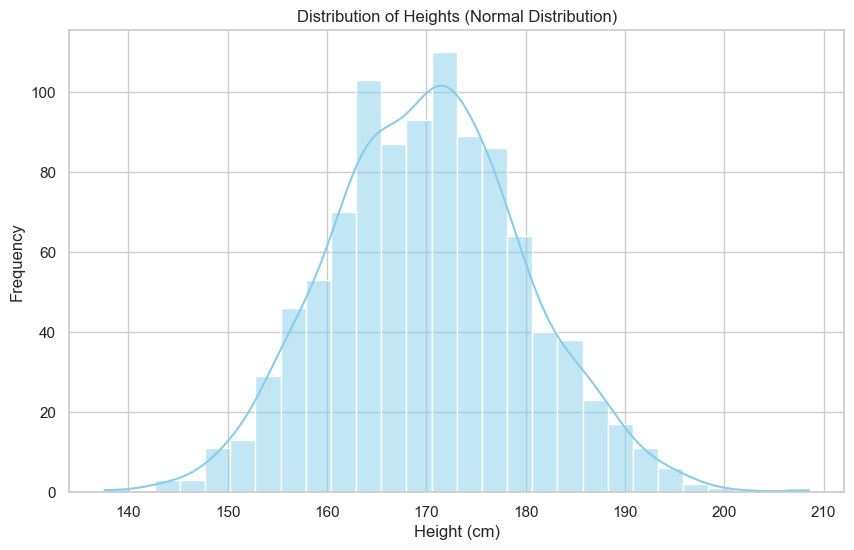

In [6]:
plt.figure()
sns.histplot(heights_df['heights'], kde=True, color='skyblue')
plt.title('Distribution of Heights (Normal Distribution)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.savefig('outputs/heights_distribution.png')
plt.show()

We visualize this with:
- Histograms showing the frequency at each height range
- KDE (Kernel Density Estimate) curves that smooth the distribution

---

**Q-Q Plot (Quantile-Quantile)**:

*Like checking if a ruler's markings are evenly spaced*
This plot compares our data against a perfect normal distribution:
- Points forming a straight line = good normal fit
- Curved patterns = deviations from normality
- Helps verify if our "heights are normal" assumption holds

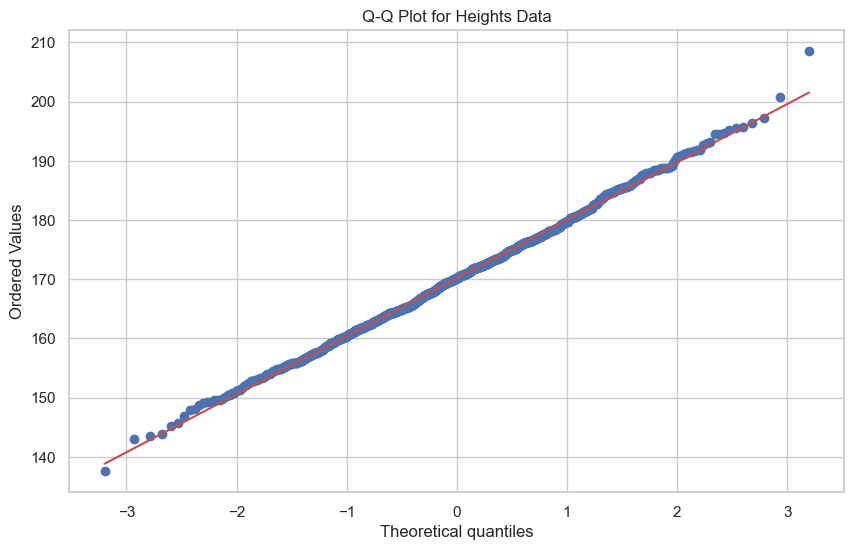

In [7]:
# Q-Q plot for normality check
plt.figure()
probplot(heights_df['heights'], plot=plt)
plt.title('Q-Q Plot for Heights Data')
plt.savefig('outputs/qq_plot_heights.png')
plt.show()

## 2. Detecting Outliers in Sales Data

In [8]:
print("Sales Dataset (Outlier Detection)")
print(sales_df.describe())

Sales Dataset (Outlier Detection)
       sales_amount
count    204.000000
mean    2127.869014
std     1627.090951
min      181.011217
25%     1039.084600
50%     1770.001620
75%     2779.947562
max    12000.000000


### Boxplot Visualization
**The outlier spotlight**  
Boxplots naturally show:
- The data's quartiles (box)
- Median (line inside box)
- Whiskers extending to normal range
- Individual points beyond whiskers = outliers

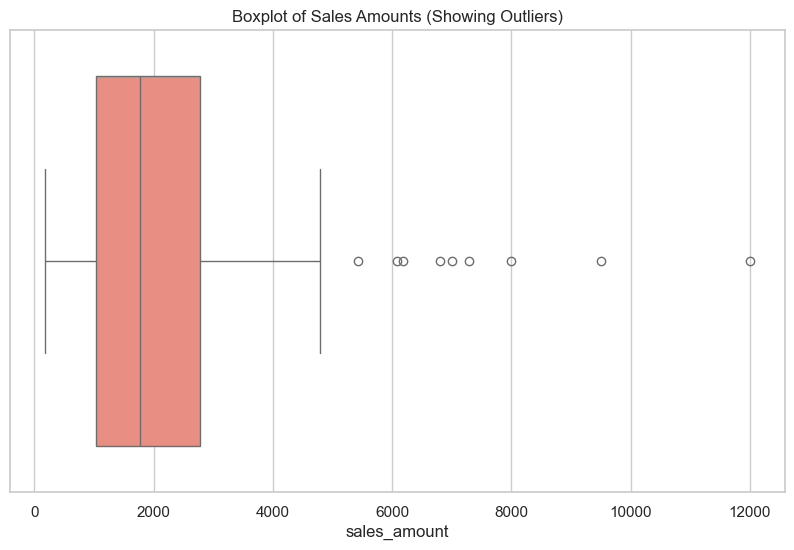

In [9]:
plt.figure()
sns.boxplot(x=sales_df['sales_amount'], color='salmon')
plt.title('Boxplot of Sales Amounts (Showing Outliers)')
plt.savefig('outputs/sales_boxplot.png')
plt.show()

*Example:* In sales data, boxplots clearly flag those few transactions that are orders of magnitude larger than typical sales.

## Outlier detection methods

### 1. Z-Score Method
**The "standard deviation ruler"**  
Measures how many σ (standard deviations) a point is from the mean:
- |Z-score| > 3 → Likely outlier
- Works best for normal distributions
- Example: A sale 5σ above average is suspicious

$$
Z = \frac{(X - μ)} {σ}
$$

In [10]:
# Z-score method
sales_df['z_score'] = zscore(sales_df['sales_amount'])
outliers_z = sales_df[np.abs(sales_df['z_score']) > 3]
print(f"\nOutliers detected by Z-score (>{3}): {len(outliers_z)}")


Outliers detected by Z-score (>3): 5


### 2. IQR Method (Interquartile Range)
**The "middle 50%" approach**  
More robust for skewed data than Z-scores:
1. Find Q1 (25th percentile) and Q3 (75th percentile)
2. Calculate IQR = Q3 - Q1
3. Define fences:  

$$Lower = Q1 - 1.5 × IQR $$

$$Upper = Q3 + 1.5 × IQR $$

In [11]:
# IQR method
Q1 = sales_df['sales_amount'].quantile(0.25)
Q3 = sales_df['sales_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = sales_df[(sales_df['sales_amount'] < lower_bound) | (sales_df['sales_amount'] > upper_bound)]
print(f"Outliers detected by IQR method: {len(outliers_iqr)}")

Outliers detected by IQR method: 9


## 3. Bernoulli and Binomial Distribution (Coin Tosses)

In [12]:
print("Coin Tosses Dataset (Bernoulli/Binomial)")
print(coin_df['outcome'].value_counts())

Coin Tosses Dataset (Bernoulli/Binomial)
outcome
0    503
1    497
Name: count, dtype: int64


**The coin flip analogy**  
Each toss is a Bernoulli trial with:
- Two outcomes: Heads (1) or Tails (0)
- Equal probability (p=0.5) for fair coins

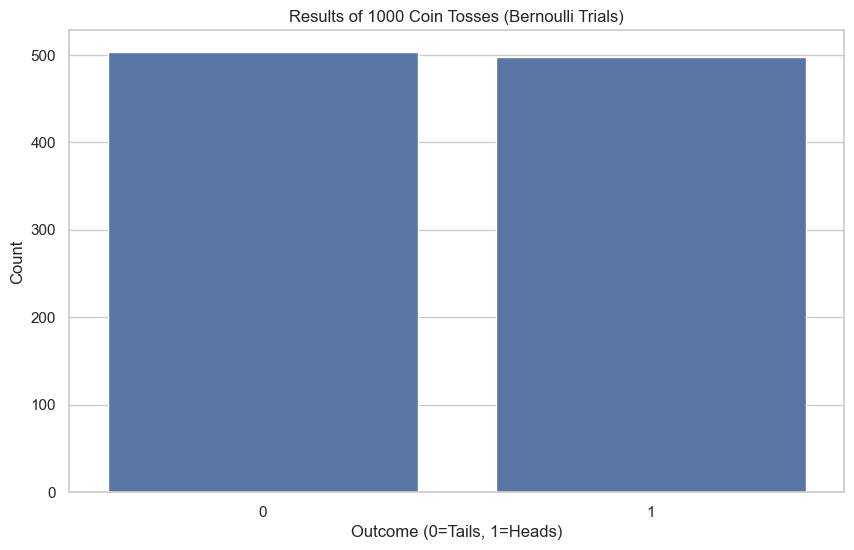

In [13]:
plt.figure()
sns.countplot(x='outcome', data=coin_df)
plt.title('Results of 1000 Coin Tosses (Bernoulli Trials)')
plt.xlabel('Outcome (0=Tails, 1=Heads)')
plt.ylabel('Count')
plt.savefig('outputs/coin_tosses.png')
plt.show()

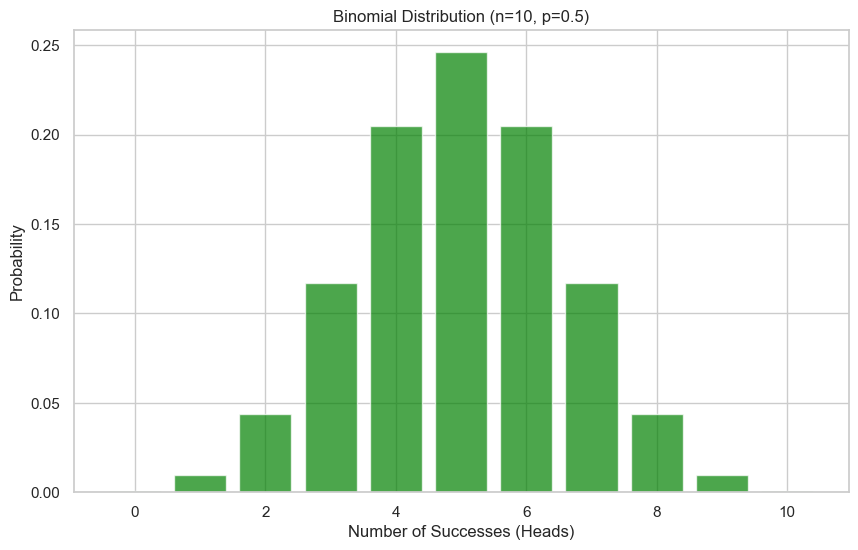

In [14]:
# Binomial distribution
n_trials = 10
prob_heads = 0.5
binom_dist = binom(n_trials, prob_heads)
x = np.arange(0, n_trials+1)
pmf = binom_dist.pmf(x)

plt.figure()
plt.bar(x, pmf, color='green', alpha=0.7)
plt.title(f'Binomial Distribution (n={n_trials}, p={prob_heads})')
plt.xlabel('Number of Successes (Heads)')
plt.ylabel('Probability')
plt.savefig('outputs/binomial_dist.png')
plt.show()

When we aggregate multiple tosses:
- Binomial distribution counts successes in n trials
- Shape becomes bell-like as trials increase (Central Limit Theorem)
- Perfect for modeling yes/no, success/failure scenarios

## 4. Uniform Distribution (Dice Rolls)

In [15]:
print("Dice Rolls Dataset (Uniform Distribution)")
print(dice_df["roll"].value_counts().sort_index())

Dice Rolls Dataset (Uniform Distribution)
roll
1    181
2    164
3    154
4    174
5    172
6    155
Name: count, dtype: int64


**Like a perfectly balanced die**  
Key characteristics:
- Equal probability for all outcomes (1-6)
- Flat histogram when we have enough rolls
- No inherent bias toward any value

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11368\158337506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='roll', data=dice_df, palette='viridis')


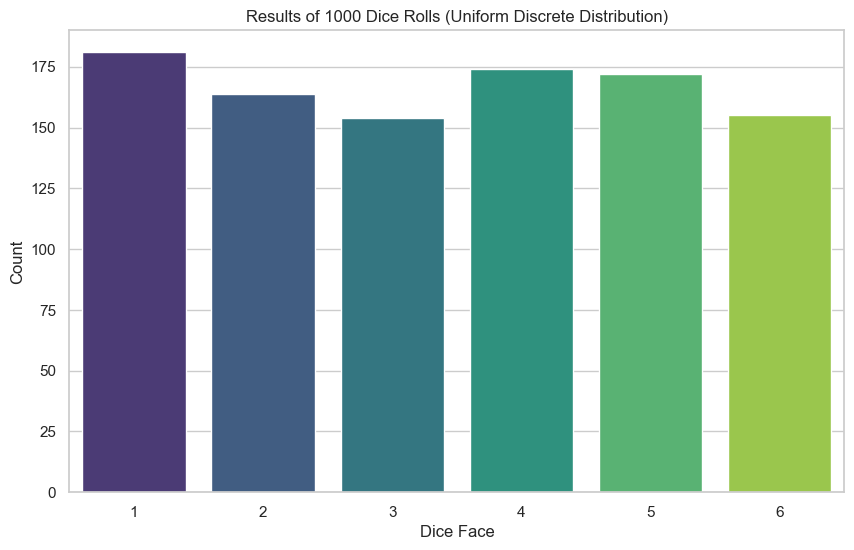

In [16]:
plt.figure()
sns.countplot(x='roll', data=dice_df, palette='viridis')
plt.title('Results of 1000 Dice Rolls (Uniform Discrete Distribution)')
plt.xlabel('Dice Face')
plt.ylabel('Count')
plt.savefig('outputs/dice_rolls.png')
plt.show()

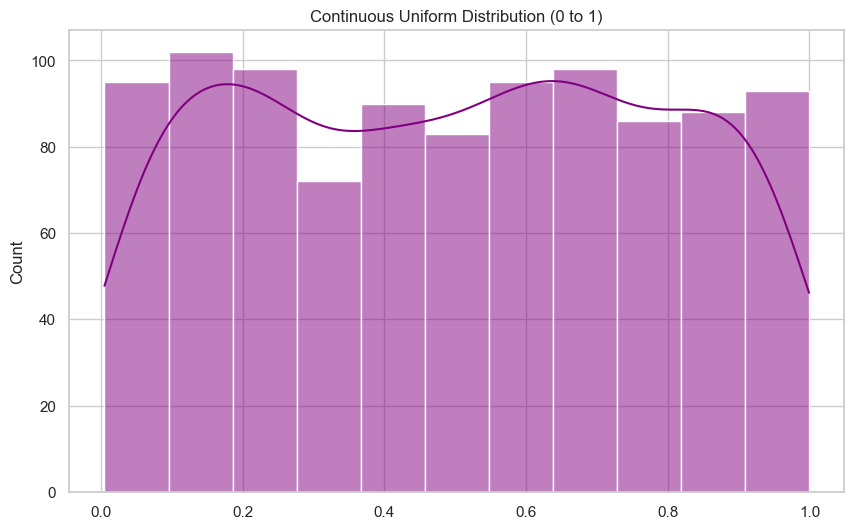

In [17]:
# Continuous uniform distribution example
plt.figure()
uniform_data = uniform.rvs(size=1000, loc=0, scale=1)
sns.histplot(uniform_data, kde=True, color='purple')
plt.title('Continuous Uniform Distribution (0 to 1)')
plt.savefig('outputs/continuous_uniform.png')
plt.show()

Applications include:
- Random number generation
- Fair game mechanics
- Sampling scenarios where all options are equally likely

---
# distributions_utils.py
---

Generating example datasets...

Example analysis:
Heights data summary:
            height
count  1000.000000
mean    170.193321
std       9.792159
min     137.587327
25%     163.524097
50%     170.253006
75%     176.479439
max     208.527315

Detecting outliers in sales data:
Z-score outliers (>3σ): 5
IQR outliers: 9


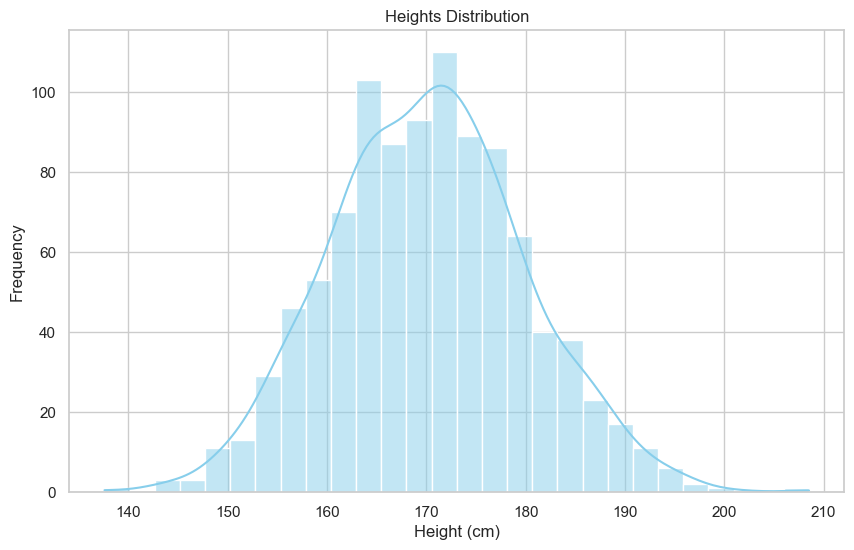

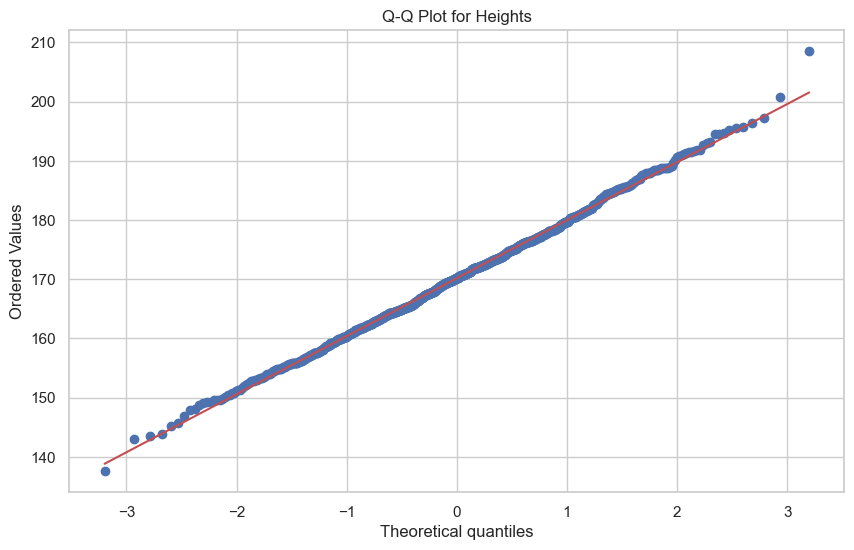

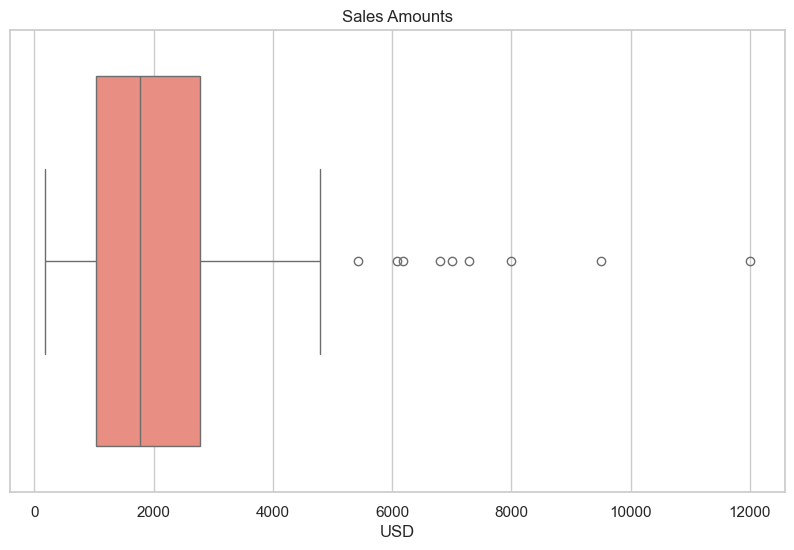

In [18]:
from distributions_utils import *

# Example usage
print("Generating example datasets...")

# Generate and save example data
heights = generate_normal_data(mean=170, std=10, size=1000, seed=42)
heights_df = save_dataset(heights, "data/heights_dataset.csv", "height")

sales = generate_sales_data(outliers=[8000, 9500, 7000, 12000], seed=42)
sales_df = save_dataset(sales, "data/sales_dataset.csv", "sales_amount")

print("\nExample analysis:")
print("Heights data summary:")
print(heights_df.describe())

print("\nDetecting outliers in sales data:")
outliers_z = detect_outliers_zscore(sales)
outliers_iqr = detect_outliers_iqr(sales)
print(f"Z-score outliers (>3σ): {len(outliers_z)}")
print(f"IQR outliers: {len(outliers_iqr)}")

# Plot examples
plot_distribution(heights, "Heights Distribution", "Height (cm)")
qq_plot(heights, "Q-Q Plot for Heights")
plot_boxplot(sales, "Sales Amounts", "USD")